### This notebook will attempt to:
- Query the stock that you want
- The start and end date
- plot out the time series, together with the 50sma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

In [2]:
def get_ticker():
    """
    It'll get the necessary info - ticker, startdate, enddate and will return a list of all these information
    """
    ticker = input("Enter ticker name: \n")
    start = input("Enter start date in this format: YYYY-M-D\n")
    end = input("Enter end date in this format: YYYY-M-D\n")
    stock_info = [ticker, start, end]
    return stock_info

def get_data(list):
    ticker = list[0]
    start = list[1]
    end = list[2]

    #Change the format of the dates to datetime format
    temp_start = start.split('-')
    start = datetime(int(temp_start[0]),int(temp_start[1]),int(temp_start[2]))
    temp_end = end.split('-')
    end = datetime(int(temp_end[0]),int(temp_end[1]),int(temp_end[2]))

    #I'll grab data from IEX in this case
    f = web.DataReader(ticker, 'iex', start, end)
    return f

def data_prep(df):
    """
    Adds the 50sma, 50sma_sd, sd_upper and sd_lower columns then returns the df w added info
    """
    df['sma50'] = df['close'].rolling(50,min_periods=1).mean() 
    df['sma50_sd'] = df['sma50'].rolling(50,min_periods=1).std()
    df['sd50_upper'] = df['sma50'] + 2*df['sma50_sd']
    df['sd50_lower'] = df['sma50'] - 2*df['sma50_sd']
    return df

In [4]:
    stock_info = get_ticker()
    ticker = stock_info[0]
    f = get_data(stock_info)
    f = data_prep(f)

Enter ticker name: 
NVDA
Enter start date in this format: YYYY-M-D
2017-10-10
Enter end date in this format: YYYY-M-D
2019-5-5


In [5]:
f.head()

,open,high,low,close,volume,sma50,sma50_sd,sd50_upper,sd50_lower
date,,,,,,,,,
2017-10-10,190.3510,191.8624,186.2045,187.8651,24371902,187.86510,NaN,NaN,NaN
2017-10-11,188.5313,189.9234,186.6818,189.8638,13237734,188.86445,0.706647,190.277744,187.451156
2017-10-12,190.0030,192.0016,188.8596,189.9533,13207315,189.22740,0.705490,190.638379,187.816421
2017-10-13,192.4591,193.9009,190.5698,193.4932,15718233,190.29385,1.002730,192.299311,188.288389
2017-10-16,194.6964,196.9317,192.1508,196.8144,14415958,191.59796,1.428149,194.454258,188.741662


**Convert the index into datetime format**

In [6]:
dates_times_obj = []
for i in f.index:
    dates_times_obj.append(datetime.strptime(i, '%Y-%m-%d').date())

Double check:

In [7]:
dates_times_obj

[datetime.date(2017, 10, 10),
 datetime.date(2017, 10, 11),
 datetime.date(2017, 10, 12),
 datetime.date(2017, 10, 13),
 datetime.date(2017, 10, 16),
 datetime.date(2017, 10, 17),
 datetime.date(2017, 10, 18),
 datetime.date(2017, 10, 19),
 datetime.date(2017, 10, 20),
 datetime.date(2017, 10, 23),
 datetime.date(2017, 10, 24),
 datetime.date(2017, 10, 25),
 datetime.date(2017, 10, 26),
 datetime.date(2017, 10, 27),
 datetime.date(2017, 10, 30),
 datetime.date(2017, 10, 31),
 datetime.date(2017, 11, 1),
 datetime.date(2017, 11, 2),
 datetime.date(2017, 11, 3),
 datetime.date(2017, 11, 6),
 datetime.date(2017, 11, 7),
 datetime.date(2017, 11, 8),
 datetime.date(2017, 11, 9),
 datetime.date(2017, 11, 10),
 datetime.date(2017, 11, 13),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 15),
 datetime.date(2017, 11, 16),
 datetime.date(2017, 11, 17),
 datetime.date(2017, 11, 20),
 datetime.date(2017, 11, 21),
 datetime.date(2017, 11, 22),
 datetime.date(2017, 11, 24),
 datetime.date(20

#### The plotting begins :)

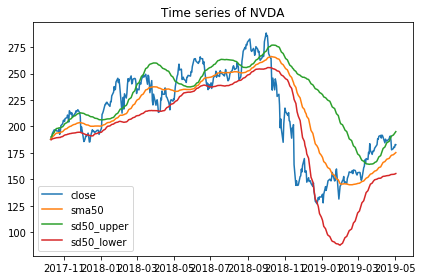

In [8]:
plt.plot(dates_times_obj,f['close'])
plt.plot(dates_times_obj,f['sma50'])
plt.plot(dates_times_obj,f['sd50_upper'])
plt.plot(dates_times_obj,f['sd50_lower'])
plt.title('Time series of '+ticker)
plt.legend()
plt.tight_layout()

**Candlestick plot**

In [9]:
import plotly
import cufflinks as cf
cf.go_offline()

In [10]:
f[['open','high','low','close']].iplot(kind='candle')